Thanks to: http://www.jamesphoughton.com/2013/08/23/making-gif-animations-with-matplotlib.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve

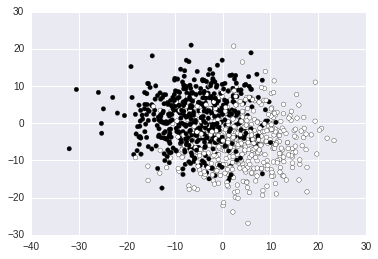

In [2]:
X, y = make_blobs(n_samples=1000, cluster_std=7, centers=2, random_state=123)

x1 = [x[0] for x in X]
x2 = [x[1] for x in X]

plt.scatter(x1, x2, c=y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

y1_pred_proba = [p[1] for p in clf.predict_proba(X_test)]

prec, rec, thresholds = precision_recall_curve(y_test, y1_pred_proba)

In [5]:
def animate(nframe):
    plt.cla()
    plt.plot(rec[:nframe], prec[:nframe], 'b-', label='Thresh:{:0.3f}, Prec:{:0.3f}, Rec:{:0.3f}'.format(thresholds[nframe],
                                                                                                         prec[nframe],
                                                                                                         rec[nframe]))
    
    plt.plot(rec[nframe], prec[nframe], 'bx')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title('PR Curve at Threshold={:0.3f}'.format(thresholds[nframe]))
    plt.legend(loc='lower left')

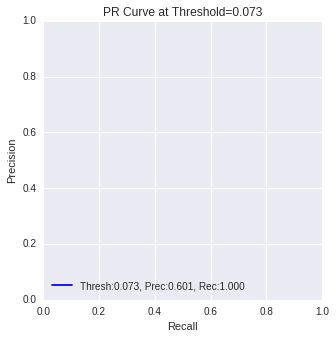

In [6]:
fig = plt.figure(figsize=(5,5))

anim = animation.FuncAnimation(fig, animate, frames=len(thresholds), repeat_delay=50)
anim.save('pr_animation.gif', writer='imagemagick', fps=int(len(thresholds)/5))